In [ ]:
!gdown 1Y4GNxWLCZixzND7IgTgN2MpChKzrDf0I
#!gdown 17UxpmLvVNAH2voQZoyvWGvtzPL9GR-G8
!gdown 15RtMIeoaI28jWKa4H7eOJ99a5HJKA3Fx

Downloading...
From: https://drive.google.com/uc?id=1Y4GNxWLCZixzND7IgTgN2MpChKzrDf0I
To: /content/Seattle_Population_Data.csv
100% 378/378 [00:00<00:00, 532kB/s]
Downloading...
From: https://drive.google.com/uc?id=15RtMIeoaI28jWKa4H7eOJ99a5HJKA3Fx
To: /content/Tacoma_Crime_Extract_(SS911).csv
100% 35.7M/35.7M [00:00<00:00, 115MB/s]


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import datetime as dt

In [ ]:
spd = pd.read_csv('/content/SPD_Crime_Data__2008-Present.csv')
spd.columns

Index(['Report Number', 'Offense ID', 'Offense Start DateTime',
       'Offense End DateTime', 'Report DateTime', 'Group A B',
       'Crime Against Category', 'Offense Parent Group', 'Offense',
       'Offense Code', 'Precinct', 'Sector', 'Beat', 'MCPP',
       '100 Block Address', 'Longitude', 'Latitude'],
      dtype='object')

In [ ]:
spd.dropna()[spd.dropna()['100 Block Address'].str.contains(' .* OF [A-Z]* .*')]['100 Block Address'].to_list()

In [ ]:
np.sort(spd['MCPP'].unique())

array(['ALASKA JUNCTION', 'ALKI', 'BALLARD NORTH', 'BALLARD SOUTH',
       'BELLTOWN', 'BITTERLAKE', 'BRIGHTON/DUNLAP', 'CAPITOL HILL',
       'CENTRAL AREA/SQUIRE PARK', 'CHINATOWN/INTERNATIONAL DISTRICT',
       'CLAREMONT/RAINIER VISTA', 'COLUMBIA CITY', 'COMMERCIAL DUWAMISH',
       'COMMERCIAL HARBOR ISLAND', 'DOWNTOWN COMMERCIAL',
       'EASTLAKE - EAST', 'EASTLAKE - WEST', 'FAUNTLEROY SW',
       'FIRST HILL', 'FREMONT', 'GENESEE', 'GEORGETOWN', 'GREENWOOD',
       'HIGH POINT', 'HIGHL', 'HIGHLAND PARK', 'HILLMAN CITY',
       'JUDKINS PARK/NORTH BEACON HILL', 'LAKEWOOD/SEWARD PARK',
       'MADISON PARK', 'MADRONA/LESCHI', 'MAGNOLIA', 'MID BEACON HILL',
       'MILLER PARK', 'MONTLAKE/PORTAGE BAY', 'MORGAN', 'MOUNT BAKER',
       'NEW HOLLY', 'NORTH ADMIRAL', 'NORTH BEACON HILL',
       'NORTH DELRIDGE', 'NORTHGATE', 'PHINNEY RIDGE', 'PIGEON POINT',
       'PIONEER SQUARE', 'QUEEN ANNE', 'RAINIER BEACH', 'RAINIER VIEW',
       'ROOSEVELT/RAVENNA', 'ROXHILL/WESTWOOD/ARBOR HEIGH

In [ ]:
nbhood = pd.read_excel('/content/SeattleCensusBlocksandNeighborhoodCorrelationFile.xlsx')

In [ ]:
np.sort(nbhood['NEIGHBORHOOD_DISTRICT_NAME'].unique())

array(['Ballard', 'Central', 'Delridge Neighborhoods', 'Downtown', 'East',
       'Greater Duwamish', 'Lake Union', 'Magnolia/Queen Anne', 'North',
       'Northeast', 'Northwest', 'Southeast', 'Southwest'], dtype=object)

In [ ]:
tpd = pd.read_csv('/content/Tacoma_Crime_Extract_(SS911).csv')

In [ ]:
spd.dropna()['Report DateTime'].str.replace('/',' ' ).str.split().str[0]

1         02
2         02
3         02
6         02
9         02
          ..
407251    12
407252    12
407256    12
407257    12
407258    12
Name: Report DateTime, Length: 229670, dtype: object

In [ ]:
spd.dropna()[['Report DateTime','Offense Start DateTime']]

,Report DateTime,Offense Start DateTime
1,02/05/2020 10:06:28 AM,02/03/2020 08:00:00 AM
2,02/05/2020 09:39:33 AM,02/02/2020 08:30:00 PM
3,02/05/2020 03:30:55 AM,02/05/2020 01:17:00 AM
6,02/04/2020 11:31:52 PM,02/04/2020 08:30:00 PM
9,02/04/2020 09:47:32 PM,02/04/2020 09:00:00 PM
...,...,...
407251,12/20/2010 08:23:00 PM,11/23/2010 10:00:00 AM
407252,12/20/2010 08:14:00 PM,12/20/2010 07:45:00 PM
407256,12/20/2010 07:11:00 PM,12/20/2010 05:00:00 PM
407257,12/20/2010 06:49:00 PM,12/20/2010 04:15:00 PM


In [ ]:
def getMonth(df, field): 
  return df[field].str.replace('/',' ' ).str.split().str[0]

def getDay(df, field): 
  return df[field].str.replace('/',' ' ).str.split().str[1]

def getYear(df, field): 
  return df[field].str.replace('/',' ' ).str.split().str[2]

def getTime(df, field): 
  return df[field].str.replace('/',' ' ).str.split().str[3]

In [ ]:
def top10_ofp_func(df):
  label = 'Offense Parent Group'
  return df.groupby(label)[label].count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
top10_ofp = top10_ofp_func(spd)['Offense Parent Group'].to_list()
top10_ofp

['LARCENY-THEFT',
 'ASSAULT OFFENSES',
 'BURGLARY/BREAKING&ENTERING',
 'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY',
 'MOTOR VEHICLE THEFT',
 'FRAUD OFFENSES',
 'TRESPASS OF REAL PROPERTY',
 'DRUG/NARCOTIC OFFENSES',
 'ROBBERY',
 'DRIVING UNDER THE INFLUENCE']

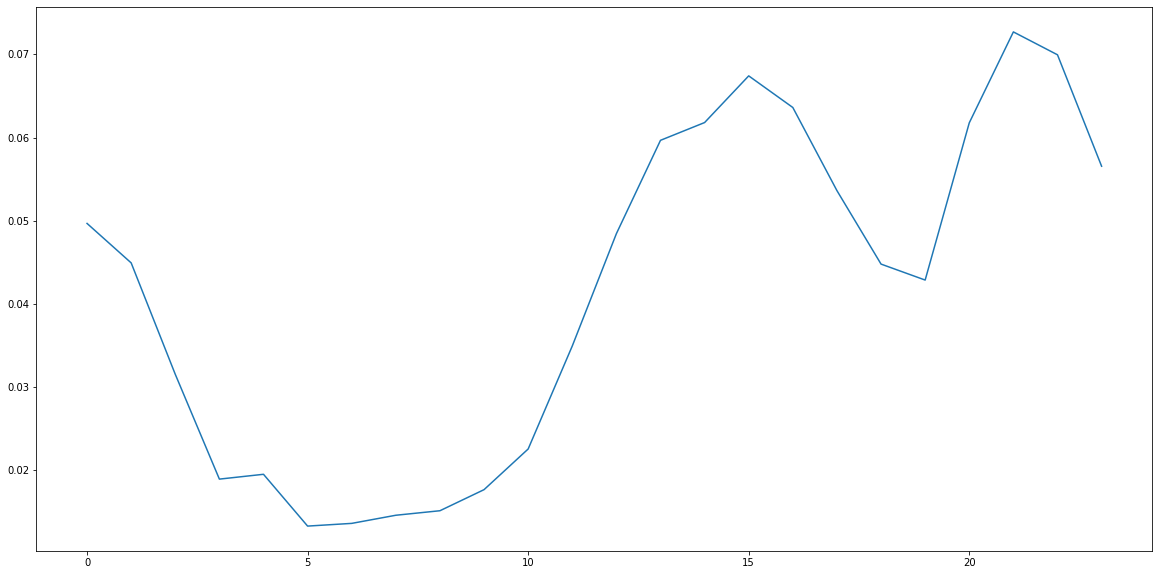

In [ ]:
def make_tod_freq_plot(df, of_parent_group, norm=False, report= False): 
  # report means that we use report time instead of start time
  time_label = 'Offense Start DateTime'
  if(report):
    time_label = 'Report DateTime'
  off_start_dt = pd.to_datetime(df[time_label], format='%m/%d/%Y %I:%M:%S %p')
  df['hour'] = off_start_dt.dt.hour
  offences = df[df['Offense Parent Group'] == of_parent_group]
  plot_data = offences.groupby('hour')['Offense Parent Group'].count()
  if(norm):
    plot_data = plot_data / offences['Offense Parent Group'].count()
  plt.plot(plot_data, label = of_parent_group)
  #print(df['hour'].unique())
x = make_tod_freq_plot(spd, 'DRUG/NARCOTIC OFFENSES', norm=True, report=True)
plt.show()
# x.count()

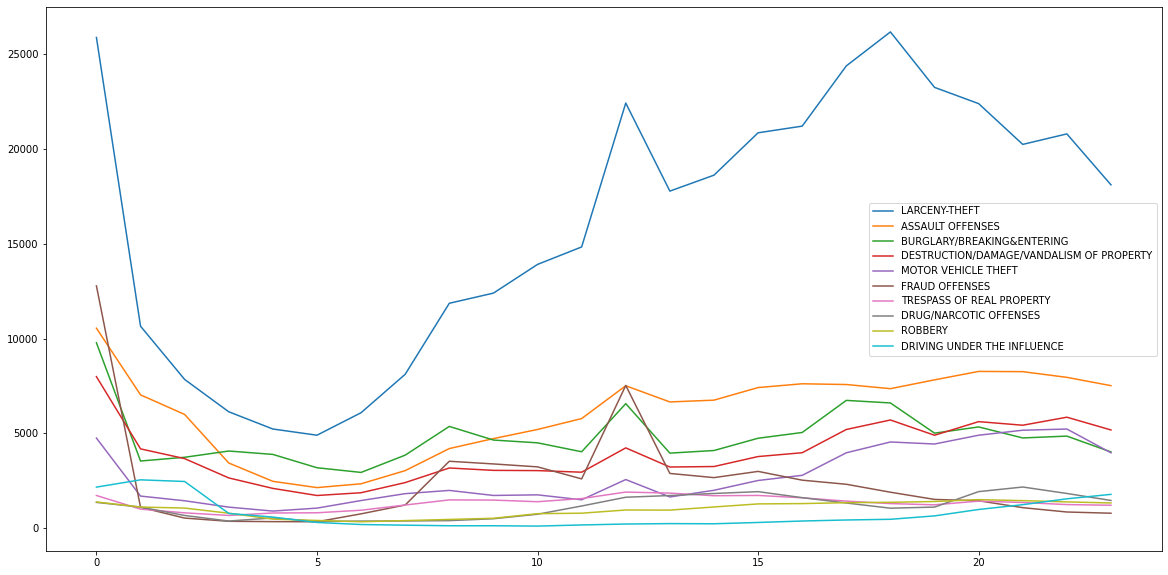

In [ ]:
for ofp in top10_ofp:
   make_tod_freq_plot(spd, ofp, norm=False, report = False)
plt.legend()
plt.show()

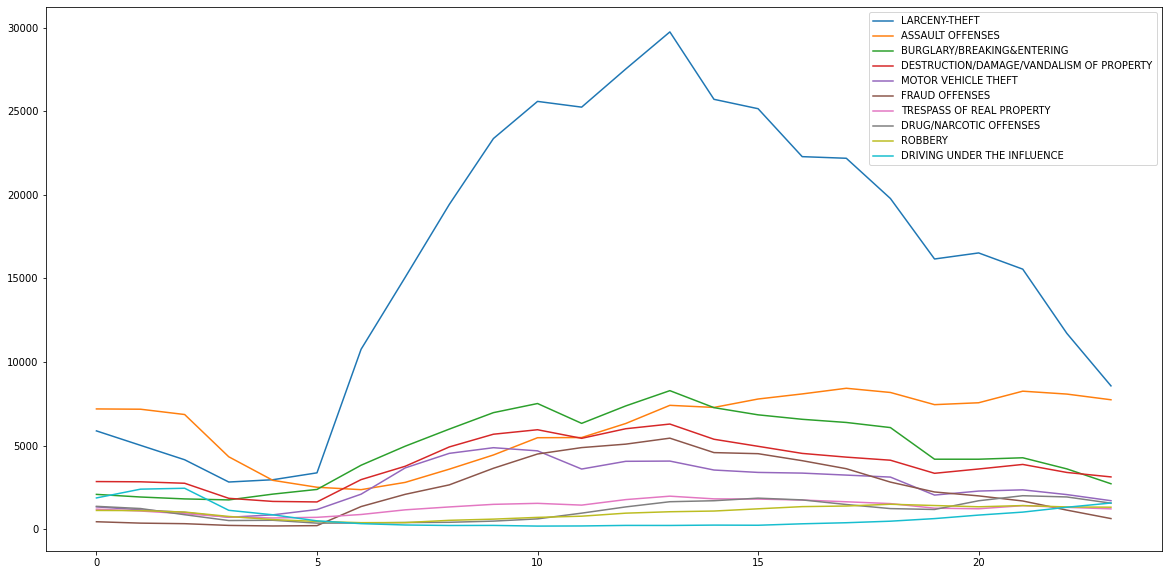

In [ ]:
for ofp in top10_ofp:
   make_tod_freq_plot(spd, ofp, norm=False, report = True)
plt.legend()
plt.show()

In [ ]:
dt.year(2019)

AttributeError: ignored

In [ ]:
(spd['Offense Parent Group'].unique())


array(['DRUG/NARCOTIC OFFENSES', 'LARCENY-THEFT', 'ROBBERY',
       'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY',
       'DRIVING UNDER THE INFLUENCE', 'FRAUD OFFENSES',
       'KIDNAPPING/ABDUCTION', 'COUNTERFEITING/FORGERY',
       'PORNOGRAPHY/OBSCENE MATERIAL', 'EXTORTION/BLACKMAIL',
       'MOTOR VEHICLE THEFT', 'SEX OFFENSES', 'STOLEN PROPERTY OFFENSES',
       'EMBEZZLEMENT', 'WEAPON LAW VIOLATIONS', 'ARSON',
       'HUMAN TRAFFICKING', 'LIQUOR LAW VIOLATIONS', 'BAD CHECKS',
       'PROSTITUTION OFFENSES', 'FAMILY OFFENSES, NONVIOLENT',
       'CURFEW/LOITERING/VAGRANCY VIOLATIONS', 'ANIMAL CRUELTY',
       'HOMICIDE OFFENSES', 'PEEPING TOM', 'DRUNKENNESS'], dtype=object)

In [ ]:
df[df['Offense Parent Group'] == 'DRUG/NARCOTIC OFFENSES'].count()

Report Number             398
Offense ID                398
Offense Start DateTime    398
Offense End DateTime      152
Report DateTime           398
Group A B                 398
Crime Against Category    398
Offense Parent Group      398
Offense                   398
Offense Code              398
Precinct                  398
Sector                    398
Beat                      398
MCPP                      398
100 Block Address         395
Longitude                 398
Latitude                  398
hour                      398
dtype: int64

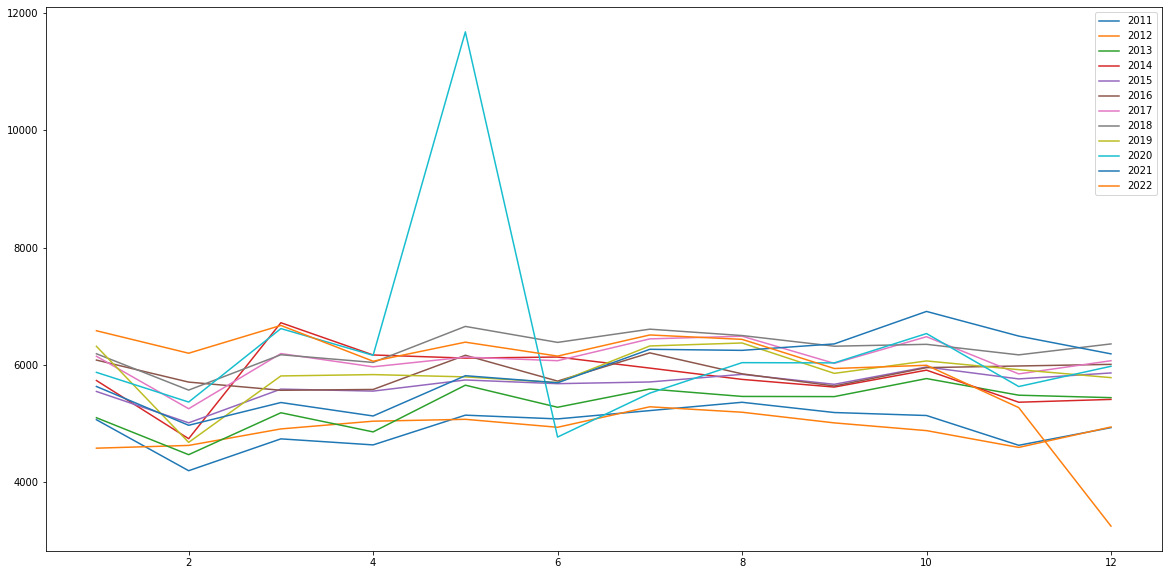

In [ ]:
def make_month_freq_plot(df, year, norm=False, report= False): 
  # report means that we use report time instead of start time
  time_label = 'Offense Start DateTime'
  if(report):
    time_label = 'Report DateTime'
  off_start_dt = pd.to_datetime(df[time_label], format='%m/%d/%Y %I:%M:%S %p')
  df['month'] = off_start_dt.dt.month
  df['year'] = off_start_dt.dt.year
  #dd = dt.date(int(year), 12, 25)
  offences = df[df['year'] == year]
  plot_data = offences.groupby('month')['Offense Parent Group'].count()
  #print(plot_data)
  if(norm):
    plot_data = plot_data / offences['Offense Parent Group'].count()
  plt.plot(plot_data, label = year)
  #print(df['hour'].unique())
for y in range(2011, 2023):
   make_month_freq_plot(spd, y, norm=False, report=False)
plt.legend()
plt.show()

In [ ]:
 x = pd.to_datetime(spd['Offense Start DateTime'], format='%m/%d/%Y %I:%M:%S %p')
 x.dt.year.unique()

array([2020., 2019., 2018., 2017., 2016., 2014., 2012., 2006., 2011.,
       2015., 2010., 2013., 2009., 2002., 2007., 2008., 2004., 2005.,
       1977., 1991., 2000., 1998., 1995., 2003., 2001., 1999., 1990.,
       1993., 1994., 1997., 1987., 1996., 1964., 1992., 1980., 1908.,
       2021.,   nan, 1979., 1915., 1929., 1974., 1984., 1989., 1953.,
       1976., 1920., 1988., 2022., 1983., 2023., 1957.])